<h1>PROJECT CITYBIKE LUBLIN 

<span style="color:green">Import all nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>CITYBIKE 2016

<h3> 1.READ DATA

<span style="color:green">Let's read data from 2016.xlsx file.

In [2]:
city_bike16 = pd.read_excel('2016.xlsx',sheet_name= ['marzec','kwiecień','maj','czerwiec','lipiec','sierpień','wrzesień', 'październik','listopad'])

In [3]:
#You have to merge dataframes by using 'concat'

city_bike16 = pd.concat(objs=[city_bike16['marzec'],city_bike16['kwiecień'],city_bike16['maj'],city_bike16['czerwiec'],city_bike16['lipiec'],city_bike16['sierpień'],city_bike16['wrzesień'], city_bike16['październik'],city_bike16['listopad']], ignore_index=True)
city_bike16.sample(3)

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
176929,17064023,69733,2016-05-05 01:37:00,2016-05-05 01:40:00,315265,315265,0,1434027
434594,19536232,69620,2016-06-18 07:36:24,2016-06-18 07:53:37,674204,674290,0,882249
653210,22221282,69359,2016-08-14 20:35:56,2016-08-14 20:53:45,315240,315242,0,984861


<span style="color:green">What would you like to  know about data?
    
<span style="color:green">Use DataFrame.info() and get information about:
    
<span style="color:green">-numbers of rows and coulmns 
    
<span style="color:green">-types of data
    
<span style="color:green">-are there missing values? 
    
<span style="color:green">-how many memory we need

In [4]:
city_bike16.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844143 entries, 0 to 844142
Data columns (total 8 columns):
uid               844143 non-null int64
bike_name         844143 non-null int64
start_time        844143 non-null datetime64[ns]
end_time          844143 non-null datetime64[ns]
start_place_id    844143 non-null int64
end_place_id      844143 non-null int64
price             844143 non-null int64
cust_id           844143 non-null int64
dtypes: datetime64[ns](2), int64(6)
memory usage: 51.5 MB


<span style="color:green">There are 201078 rows and 8 columns.

<span style="color:green">Dtypes: datetime64(2), int64(6)

<span style="color:green">There are not missing value - every columns has the same num non-null values

<span style="color:green">We use 51.5MB

In [5]:
#You can also use DataFrame.shape to get num of rows and columns and DataFrame.isnull to get num of non-null values

print(city_bike16.shape )

print(city_bike16.isnull().any().any()) #False means that you don't have any non-missing values

(844143, 8)
False


In [6]:
#Create additional TIME columns so it would be easier to manipulate the data

city_bike16['start_day'] = pd.DatetimeIndex(city_bike16['start_time']).dayofyear

city_bike16['start_month'] = pd.DatetimeIndex(city_bike16['start_time']).month

city_bike16['day_of_month'] = pd.DatetimeIndex(city_bike16['start_time']).day

city_bike16['day_of_week'] = pd.DatetimeIndex(city_bike16['start_time']).dayofweek

city_bike16['date'] = pd.DatetimeIndex(city_bike16['start_time']).date


#Create additional duration column so it would be easier to manipulate the data

city_bike16['duration'] = city_bike16['end_time']-city_bike16['start_time']

city_bike16['duration_sec']= pd.TimedeltaIndex(city_bike16['end_time']-city_bike16['start_time']).seconds

city_bike16['duration_min'] = city_bike16['duration_sec'] / 60

city_bike16['duration_hour'] = city_bike16['duration_sec']/3600

city_bike16['start_hour'] = pd.DatetimeIndex(city_bike16['start_time']).hour

#Was it weekend?

city_bike16['is_weekend'] = city_bike16['day_of_week'].apply(lambda x: 1 if (x == 6 or x == 5 ) else 0 )

#Was it a holiday?

free = [ datetime.date(2016,1,1),
        datetime.date(2016,1,6),
        datetime.date(2016,3,27),
        datetime.date(2016,3,28),
        datetime.date(2016,5,1),
        datetime.date(2016,5,3),
        datetime.date(2016,5,15),
        datetime.date(2016,5,26),
        datetime.date(2016,8,15),
        datetime.date(2016,11,1),
        datetime.date(2016,11,11),
        datetime.date(2016,11,12),
        datetime.date(2016,12,25),
        datetime.date(2016,12,26)
        ]

city_bike16['is_free'] = city_bike16['date'].apply(lambda x: 1 if (x in free) else 0 )



city_bike16.sample(5)

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id,start_day,start_month,day_of_month,day_of_week,date,duration,duration_sec,duration_min,duration_hour,start_hour,is_weekend,is_free
757090,23888487,69605,2016-09-17 18:23:50,2016-09-17 18:42:43,315235,315225,0,865327,261,9,17,5,2016-09-17,00:18:53,1133,18.883333,0.314722,18,1,0
640735,22028012,69123,2016-08-10 07:17:36,2016-08-10 07:24:14,315245,674356,0,934317,223,8,10,2,2016-08-10,00:06:38,398,6.633333,0.110556,7,0,0
197388,17300823,69742,2016-05-09 00:30:00,2016-05-09 00:40:00,673880,315266,0,1424888,130,5,9,0,2016-05-09,00:10:00,600,10.000000,0.166667,0,0,0
632161,21903636,69433,2016-08-07 16:20:27,2016-08-07 16:30:03,315251,674290,0,1640118,220,8,7,6,2016-08-07,00:09:36,576,9.600000,0.160000,16,1,0
341050,20012751,69903,2016-06-27 14:19:07,2016-06-27 14:31:43,315273,315271,0,1033437,179,6,27,0,2016-06-27,00:12:36,756,12.600000,0.210000,14,0,0


<h3>2.DATA PREPARATION

<span style="color:blue">Before we start analyzing our data, we must prepare it. This will involve cleaning data sets and bringing them to a form that we can work with.It's crucial to be able to deal with messy data, whether that means missing values, malformed records or nonsensical outliers.

In [7]:
#At first: remove every rentals under 3 minutes, where 'start_place_id' is the same like 'stop_place_id' 
#It was probably a mistake and the person who rented the bike changed their minds
#or the bike turned out to be broken

drop_rows = city_bike16[city_bike16['start_place_id'] == city_bike16['end_place_id']]

drop_rows = drop_rows[drop_rows['duration_min']<3]

city_bike16.drop(drop_rows.index, inplace=True)

city_bike16

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id,start_day,start_month,day_of_month,day_of_week,date,duration,duration_sec,duration_min,duration_hour,start_hour,is_weekend,is_free
1,15797788,69647,2016-03-21 09:00:18,2016-03-21 09:06:57,674377,360123,0,876773,81,3,21,0,2016-03-21,00:06:39,399,6.650000,0.110833,9,0,0
2,15797846,69832,2016-03-21 09:04:51,2016-03-21 09:09:50,674230,674214,0,878899,81,3,21,0,2016-03-21,00:04:59,299,4.983333,0.083056,9,0,0
3,15797801,69501,2016-03-21 09:01:32,2016-03-21 09:09:50,673978,674008,0,1032595,81,3,21,0,2016-03-21,00:08:18,498,8.300000,0.138333,9,0,0
4,15797845,69023,2016-03-21 09:04:50,2016-03-21 09:13:37,315265,315233,0,884463,81,3,21,0,2016-03-21,00:08:47,527,8.783333,0.146389,9,0,0
5,15797800,69626,2016-03-21 09:01:26,2016-03-21 09:15:55,674377,315271,0,876026,81,3,21,0,2016-03-21,00:14:29,869,14.483333,0.241389,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844138,25544148,69162,2016-11-30 23:09:36,2016-11-30 23:22:30,315272,315238,0,1169828,335,11,30,2,2016-11-30,00:12:54,774,12.900000,0.215000,23,0,0
844139,25544185,69582,2016-11-30 23:17:55,2016-11-30 23:27:18,673887,673880,0,870687,335,11,30,2,2016-11-30,00:09:23,563,9.383333,0.156389,23,0,0
844140,25544192,69594,2016-11-30 23:18:51,2016-11-30 23:32:05,674393,674393,0,879185,335,11,30,2,2016-11-30,00:13:14,794,13.233333,0.220556,23,0,0
844141,25544335,69840,2016-11-30 23:50:32,2016-11-30 23:55:58,674359,315275,0,923936,335,11,30,2,2016-11-30,00:05:26,326,5.433333,0.090556,23,0,0


In [8]:
#Next: remove rows where 'start_time' > 'end_time' and 'start_time' == 'end_time'

city_bike16 = city_bike16[city_bike16['start_time'] < city_bike16['end_time']]

In [9]:
#In the end: remove columns cust_id, price and 'uid'

city_bike16.drop(columns=['cust_id','price', 'uid'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#Last: remove all rides over 12 h - we can rent bike only for 12 hours

city_bike16= city_bike16[city_bike16['duration_hour']<12]

city_bike16['duration'].sort_values(ascending=False) #rows from 1 to 5 show rides over 1 day - remove this rows

414503   3 days 02:45:53
470312   2 days 05:35:40
408564   2 days 02:17:57
842958   1 days 06:38:26
428467   1 days 01:31:00
               ...      
49269    0 days 00:00:01
534488   0 days 00:00:01
813306   0 days 00:00:01
779281   0 days 00:00:01
731641   0 days 00:00:01
Name: duration, Length: 783697, dtype: timedelta64[ns]

In [11]:
city_bike16.drop([414503 ,470312,408564,842958,428467], inplace=True)

In [12]:
city_bike16.head(3)

,bike_name,start_time,end_time,start_place_id,end_place_id,start_day,start_month,day_of_month,day_of_week,date,duration,duration_sec,duration_min,duration_hour,start_hour,is_weekend,is_free
1,69647,2016-03-21 09:00:18,2016-03-21 09:06:57,674377,360123,81,3,21,0,2016-03-21,00:06:39,399,6.650000,0.110833,9,0,0
2,69832,2016-03-21 09:04:51,2016-03-21 09:09:50,674230,674214,81,3,21,0,2016-03-21,00:04:59,299,4.983333,0.083056,9,0,0
3,69501,2016-03-21 09:01:32,2016-03-21 09:09:50,673978,674008,81,3,21,0,2016-03-21,00:08:18,498,8.300000,0.138333,9,0,0


<h3>3.DATA ANALYSIS

In [13]:
#For how many days were the bikes available for rental?

num_of_days = city_bike16['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas')

The bikes were available for rental for 255 dyas


In [14]:
#How many rentals and bikes were there?

num_of_bikes = city_bike16['bike_name'].nunique()

num_of_rent = city_bike16['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, \nCount of bikes: {num_of_bikes}')

Count of rentals:783692, 
Count of bikes: 911


In [15]:
#The average time of a rental:

avg_time = city_bike16['duration_min'].mean()

print(f'The average time of rental: {avg_time}')

The average time of rental: 17.560776470007728


In [16]:
#Rentals under 20 minutes

rentals_under_20 = len(city_bike16[city_bike16['duration_min']<20])

print('Num of rentals under 20 minutes:', rentals_under_20)

Num of rentals under 20 minutes: 631600


In [17]:
#Number of rentals per month, most popular month

month = {3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November'}

top_month = city_bike16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]}')

city_bike16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by=['bike_name'], ascending=False)


The most popular month is: May


,bike_name
start_month,
5,156907
6,151186
4,131390
7,107111
8,88238
9,77609
10,35637
11,19673
3,15941


In [18]:
#Daily top score

top_day = city_bike16.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')


city_bike16.groupby(['start_day']).agg({'bike_name':'count'}).sort_values(by=['bike_name'],ascending=False).head(1)


The most popular day: 2016-04-05


,bike_name
start_day,
96,7248


In [19]:
#Most popular start station

top_s_station = city_bike16['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_s_station}')

The most popular start station number: 315269


In [20]:
#Most popular end station

top_end_station = city_bike16['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_end_station}')

The most popular start station number: 315269


In [21]:
#How many bikes depart from each station monthly? 

city_bike16.groupby(['start_place_id','start_month'])[['bike_name']].count().head()

bike_name
start_place_id start_month           
0              4                    2
               5                    1
155814         6                    1
155930         4                    1
155998         7                    1

In [22]:
#How many bikes return from each station monthly? 

city_bike16.groupby(['end_place_id','start_month'])[['bike_name']].count().head()

,,bike_name
end_place_id,start_month,
155831,5,1
155918,4,1
155930,4,1
155942,5,1
155998,7,1


In [23]:
#Most rented bike

top_bike = city_bike16['bike_name'].value_counts().head(1).index[0]

#or

top_bike = city_bike16['bike_name'].value_counts().idxmax()

print(f'The most popular bike: {top_bike}')


The most popular bike: 69602


In [24]:
#Check if the most rented bike has visited all the stations during te season? If not what were the not visited stations?


mr_bike = city_bike16[city_bike16['bike_name'] == 69602]

print('The busiest bike visited', mr_bike['end_place_id'].nunique(),'return stations and',mr_bike['start_place_id'].nunique(),
      'departure stations.')

The busiest bike visited 87 return stations and 88 departure stations.


In [25]:
mr_bike = city_bike16[city_bike16['bike_name'] == 69602] #most rented bike

mr_bike['start_place_id'].unique() #stations which was visited by mr_bike

city_bike16['start_place_id'].unique() #all stations

pd.Series(mr_bike['start_place_id'].unique()) #you have to change ndarray to Series

pd.Series(mr_bike['start_place_id'].unique()).index #you need to get index, becouse in the nest step you will use drop method
                                                    #(this method demand a list of rows numbers )

pd.Series(city_bike16['start_place_id'].unique()).drop(pd.Series(mr_bike['start_place_id'].unique()).index) 
#you get list wiht not visited stations

88      762445
89      446969
90      536377
91      692585
92      766173
        ...   
802    2216294
803    2248765
804    2249817
805    2251239
806    2253419
Length: 719, dtype: int64

In [26]:
#Find the longest ride

longest_ride = city_bike16.sort_values(by = ['duration'],ascending=False)

longest_ride.head(1).index[0] #get index the longest trip

longest_ride['duration'].loc[448834] ##find right row

print('The longest ride:',longest_ride['duration'].loc[448834])

longest_ride.loc[448834] #another info about this trip

The longest ride: 0 days 11:54:03


bike_name                       69853
start_time        2016-06-21 00:01:11
end_time          2016-06-21 11:55:14
start_place_id                 674230
end_place_id                   315229
start_day                         173
start_month                         6
day_of_month                       21
day_of_week                         1
date                       2016-06-21
duration              0 days 11:54:03
duration_sec                    42843
duration_min                   714.05
duration_hour                 11.9008
start_hour                          0
is_weekend                          0
is_free                             0
Name: 448834, dtype: object

In [27]:
#How often the bikes were rented
#There were 783 692 rent per 255 days
#Num of day * num of hours per day * num of minutes per hour * num of seconds per minute:

#255 * 24 * 60 * 60 = 22 032 000‬

freq = 22032000 // 783692

print(f'The bikes were rented every {freq} sec.')

The bikes were rented every 28 sec.


In [28]:
#Average rent number per bike
#There were 911 bikes which were rented 783 692 times

avg_per_bike = 783692 // 911

#It means that:
print(f'Every bike was average rented {avg_per_bike} times during 9 months')

Every bike was average rented 860 times during 9 months


<h3>3.PLOTS

In [29]:
#Create a plot for average rent number per month

average_rent = city_bike16.groupby('start_month').agg({'bike_name':'count'}) #I count num of rent per month

average_rent['num_day_in_month'] = city_bike16.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month

average_rent['result'] = average_rent['bike_name']//average_rent['num_day_in_month'] #I count average rent number for every month

average_rent

,bike_name,num_day_in_month,result
start_month,,,
3,15941,11,1449
4,131390,30,4379
5,156907,31,5061
6,151186,30,5039
7,107111,31,3455
8,88238,31,2846
9,77609,30,2586
10,35637,31,1149
11,19673,30,655


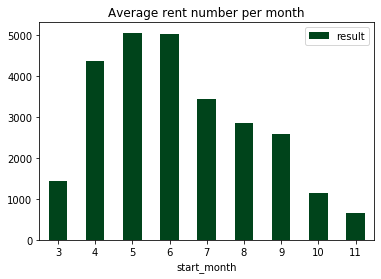

In [30]:
#Use matplotlib
average_rent['result'].plot(kind = 'bar', rot=360, title = 'Average rent number per month', legend = True, colormap = 'Greens_r');

In [ ]:
#This is the same plot but by using plotly

fig = go.FigureWidget(data=go.Bar(y=average_rent['result'], x = ['March','April','May','June','July','August','September','October','November']))
fig.update_layout(
    title={
        'text': 'Average rent number per month',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='green')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None

    )

fig.show()

In [ ]:
#Create a plot for average rent number per day of week

rent_num_per_day = city_bike16.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week

rent_num_per_day

In [ ]:
num_of_day_df = pd.DataFrame(city_bike16.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_per_day['num_of_days']=num_of_day_df['day_of_week']

rent_num_per_day['num_per_day'] = rent_num_per_day['bike_name']['count'] / rent_num_per_day['num_of_days']

rent_num_per_day.round(2)

In [ ]:
fig = px.bar(rent_num_per_day, x=rent_num_per_day.index, y='num_per_day')
fig.update_layout(
    title={
        'text': "Number of rentals per day of week.",
         'font': {
              'family': 'Calibri',
              'size': 30
        },
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='darkolivegreen')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None
    )
fig.show()

In [ ]:
#Create a plot for average time of rent per day of week

average_time_of_rent_per_day = city_bike16.groupby('day_of_week').agg({'duration_min':'mean'})
average_time_of_rent_per_day.reset_index(inplace=True)
average_time_of_rent_per_day

In [ ]:
average_time_of_rent_per_day.plot(x = 'day_of_week', y = 'duration_min', kind ='line',color='g');

In [ ]:
fig = go.Figure()
fig. add_trace(go.Bar(x=average_time_of_rent_per_day['day_of_week'], y=average_time_of_rent_per_day['duration_min']))
fig.update_layout(
    title={
        'text': 'Average time of rent per day of week',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='forestgreen')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None)

fig.show()

In [ ]:
#Create a plot for average number of rents per hour (so we can check for example
#how many rents on average are there during rush hours )

ave_rent_per_h = city_bike16.groupby(['start_hour']).agg({'bike_name':'count'})

ave_rent_per_h

In [ ]:
ave_rent_per_h.plot(kind ='bar', figsize = (15,7), use_index=True, xticks = (range(24)),rot = 45, grid=True, colormap = 'PRGn_r');
                   

In [ ]:
#Create a plot for average number of rents per hour per day of week (so we can check for example
#if there is a different beetwen day of week and day of weekend)

rush_hour_weekday = city_bike16[city_bike16['is_weekend']==0]

rush_hour_weekend = city_bike16[city_bike16['is_weekend']==1]

rush_hour_holiday = city_bike16[city_bike16['is_free']==1]

rush_hour_weekday = rush_hour_weekday.groupby('start_hour').agg({'bike_name':'count'})
rush_hour_weekend = rush_hour_weekend.groupby('start_hour').agg({'bike_name':'count'})
rush_hour_holiday = rush_hour_holiday.groupby('start_hour').agg({'bike_name':'count'})

rush_hour_weekday.plot(kind ='bar', figsize = (15,2),title = 'Weekday', use_index=False, xticks = (range(24)),rot = 45, grid=True, colormap = 'Greens_r');

rush_hour_weekend.plot(kind ='bar', figsize = (15,2),title = 'Weekend', use_index=False, xticks = (range(24)),rot = 45, grid=True, colormap = 'Accent');

rush_hour_holiday.plot(kind = 'bar', figsize = (15,2),title = 'Holiday', use_index=False, xticks = (range(24)),rot = 45, grid=True, colormap = 'Greys_r');
rush_hour_holiday.tail()

In [ ]:
#the same charts in plotly

trace0 = go.Scatter(x=rush_hour_weekday.index,
                y=rush_hour_weekday['bike_name'],
                   name='working',
                 mode='lines+markers',
                marker=dict(size=12)
               )

trace1 = go.Scatter(x=rush_hour_weekend.index,
                 y=rush_hour_weekend['bike_name'],
                   name='weekend',
                    mode='lines+markers',
                marker = dict(size=12)
                   )
trace2 = go.Scatter(x=rush_hour_holiday.index,
                   y=rush_hour_holiday['bike_name'],
            name='holiday',
                mode='lines+markers',
        marker=dict(size=12)
        )
        
data=[trace0,trace1,trace2]

layout = {
        'xaxis':{'title':'Hours'},
         'yaxis':{'title':'Count of bikes'},
         }



fig = go.Figure(data, layout=layout)

fig.show()

<span style="color:green">Results:The plots look similar but we can notice some diferences. 
    
<span style="color:green">From monday to Friday beetwen 6 nad 8 a.m people usually go to work or to school and we can see it on the charts. 
    
<span style="color:green">At the same time there are fewer rentals on Saturday and Sunday.
    
<span style="color:green">The most popular hour of the week is beetwen 3 and 4 p.m (when people return home), in the weekend it is beetwen 5 and 6 p.m

In [ ]:
city_bike16.to_csv('c_b16')

<h3>4.Conclusions

<span style="color:green">1. The bikes were available by 255 days
    
<span style="color:green">2. The number of available bikes: 911 and they were rented 783 692 times
    
<span style="color:green">3. The average time of rent: 17.56
    
<span style="color:green">4. Count of rentals under 20 minutes: 631 600 which is more than half all rentals
    
<span style="color:green">5. The most popular month was May, and the most popular day was 2016-04-05, it was Tuesday
    
<span style="color:green">6. The most popular start and end station number: 315269
    
<span style="color:green">7. The most popular bike: 69602
 
<span style="color:green">8. The busiest bike visited 87 return stations and 88 departure stations,
    
<span style="color:green">9. The longest ride lasted 11:54:03, began 2016-06-21 01:11:00 and ended 2016-06-21 02:19:00 on Tuesday 
    
<span style="color:green">10. The average rent number per day of week was the highest on Thuersday
    
<span style="color:green">11. The average time of rent per day of week was the highest in Saturday (19.79) and Sunday (22.40)
    
<span style="color:green">12. The most popular hours for rent was beetwen  3 pm and 4 pm

<span style="color:green">13. Bikes were rented every 28 sec 

<span style="color:green">14.Every bike was average rented 860 times during 9 months 